<a href="https://colab.research.google.com/github/Yahred/evolutionary-computation/blob/main/EAFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos genéticos: Ejemplo aproximando una función

Instalamos las bibliotecas necesarias

In [2]:
pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.8 MB/s eta 0:00:00


In [3]:
import random
import array
import random
import math
import matplotlib.pyplot as plt

import numpy as np
from deap import base, creator, tools, algorithms

In [4]:
y_puntos = [-9.47530499, -8.20053076, -7.06007355, -6.07004795, -5.27138796, -4.66909356, -4.19457453, -3.84919918, -3.65942874, -3.55181112, -3.51373936, -3.57264491, -3.64987936, -3.70235606, -3.740946, -3.77725596, -3.69827274, -3.61302712, -3.41808667, -3.08308666, -2.70158321, -2.22867037, -1.6511668, -1.03678599, -0.38456232, 0.33075079, 1.02477883, 1.73094186, 2.36205994, 2.95806084, 3.4237866, 3.82636692, 4.13496303, 4.27157043, 4.29493587, 4.17829624, 3.95409283, 3.56992402, 3.12288977, 2.54601402, 1.91026026, 1.22867569, 0.5422082, -0.15349255, -0.811973, -1.42121758, -1.95555196, -2.40673855, -2.74191681, -2.9531929, -3.02569868, -2.96935198, -2.8077883, -2.51352989, -2.1299076, -1.63410109, -1.10580826, -0.51745204, 0.10152695, 0.72202862, 1.30413158, 1.86537205, 2.32219095, 2.72308679, 3.03966672, 3.25492871, 3.40087177, 3.39878705, 3.35382379, 3.21714617, 3.03930083, 2.80648229, 2.55612964, 2.37850053, 2.17973998, 2.08049234, 2.03455593, 2.11668995, 2.36365782, 2.70136088, 3.20906666, 3.88418985, 4.75685859, 5.73009392, 6.89142106, 8.19980283, 9.64580405, 11.17160365, 12.77006736, 14.48209584, 16.1949218, 17.94359567, 19.65124253, 21.36240072, 23.01681852, 24.63925159, 26.20180742, 27.69009341, 29.13518722, 30.54860084]
x_puntos = [-2.0, -1.95959596, -1.91919192, -1.87878788, -1.83838384,
            -1.7979798, -1.75757576, -1.71717172, -1.67676768, -1.63636364,
            -1.5959596, -1.55555556, -1.51515152, -1.47474747, -1.43434343,
            -1.39393939, -1.35353535, -1.31313131, -1.27272727, -1.23232323,
            -1.19191919, -1.15151515, -1.11111111, -1.07070707, -1.03030303,
            -0.98989899, -0.94949495, -0.90909091, -0.86868687, -0.82828283,
            -0.78787879, -0.74747475, -0.70707071, -0.66666667, -0.62626263,
            -0.58585859, -0.54545455, -0.50505051, -0.46464646, -0.42424242,
            -0.38383838, -0.34343434, -0.3030303, -0.26262626, -0.22222222,
            -0.18181818, -0.14141414, -0.1010101, -0.06060606, -0.02020202,
             0.02020202, 0.06060606, 0.1010101, 0.14141414, 0.18181818,
             0.22222222, 0.26262626, 0.3030303, 0.34343434, 0.38383838,
             0.42424242, 0.46464646, 0.50505051, 0.54545455, 0.58585859,
             0.62626263, 0.66666667, 0.70707071, 0.74747475, 0.78787879,
             0.82828283, 0.86868687, 0.90909091, 0.94949495, 0.98989899,
             1.03030303, 1.07070707, 1.11111111, 1.15151515, 1.19191919,
             1.23232323, 1.27272727, 1.31313131, 1.35353535, 1.39393939,
             1.43434343, 1.47474747, 1.51515152, 1.55555556, 1.5959596,
             1.63636364, 1.67676768, 1.71717172, 1.75757576, 1.7979798,
             1.83838384, 1.87878788, 1.91919192, 1.95959596, 2.0]

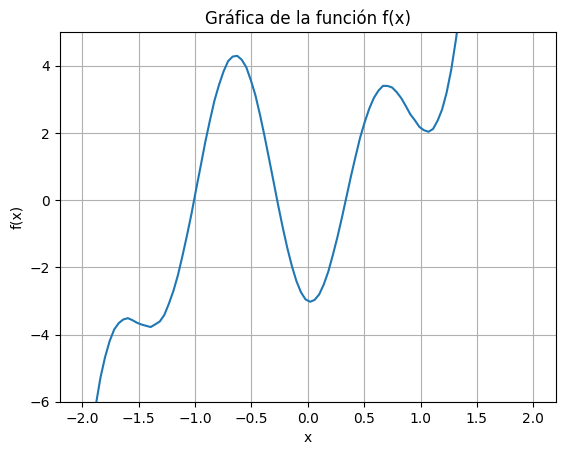

In [49]:
plt.plot(x_puntos, y_puntos)
plt.ylim(-6, 5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de la función f(x)')
plt.grid(True)
plt.show()

Definimos lso parametros de nuestro algoritmo


In [52]:
generaciones = 100
tamaño_poblacion = 50
longitud_cromosoma = 5
objetivo = 3
tamaño_torneo = 3

In [53]:
def f(x):
  return a*x**3 + b*x**2 - c * x - d * math.cos(e*x)

Definimos la función de aptitud

In [54]:
def fitness(individuo: list[int]):
    a, b, c, d, e = individuo

    def funcion(x):
      return a*x**3 + b*x**2 - c * x - d * math.cos(e*x)

    aprox = np.array([funcion(x) for x in x_puntos])
    error = np.sum((np.array(y_puntos) - aprox)**2) / len(x_puntos)

    return error,

Configuramos la evolución

In [55]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.mean)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -10, 10)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=5)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", fitness)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)

toolbox.register("select", tools.selTournament, tournsize=3)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Iniciamos la evolución

In [75]:
pop = toolbox.population(n=100)

# Define los parámetros del algoritmo evolutivo
n_generations = 1000
cx_prob = 0.5
mut_prob = 0.5

# Ejecuta el algoritmo evolutivo
algorithms.eaSimple(pop, toolbox, cxpb=cx_prob, mutpb=mut_prob, ngen=n_generations, stats=stats, verbose=True)
ganador = tools.selBest(pop, k=1)[0]

gen	nevals	avg    
0  	100   	580.138
1  	78    	310.531
2  	82    	167.831
3  	67    	92.6939
4  	68    	46.7219
5  	76    	26.4849
6  	78    	19.3481
7  	74    	15.2506
8  	70    	11.9552
9  	85    	12.0748
10 	66    	10.1456
11 	58    	9.6217 
12 	72    	11.827 
13 	81    	11.1095
14 	63    	9.44715
15 	83    	9.94699
16 	70    	8.88575
17 	80    	10.004 
18 	81    	6.73481
19 	83    	6.69956
20 	86    	5.57052
21 	83    	4.90022
22 	68    	3.03331
23 	72    	3.50045
24 	78    	2.99564
25 	66    	2.7316 
26 	72    	2.35972
27 	74    	3.69357
28 	76    	2.57864
29 	71    	3.19574
30 	83    	3.11635
31 	76    	2.10068
32 	73    	2.82723
33 	68    	1.53889
34 	85    	3.99277
35 	81    	3.22036
36 	64    	1.99287
37 	78    	1.32579
38 	71    	2.25762
39 	82    	1.79381
40 	74    	2.50425
41 	75    	1.47   
42 	76    	1.96844
43 	68    	1.53809
44 	73    	2.36245
45 	72    	2.81342
46 	79    	1.86524
47 	78    	2.17732
48 	72    	1.71662
49 	73    	1.35756
50 	81    	2.61144
51 	81    	2

In [76]:
ganador

[2.992909417772026,
 2.0004057720739823,
 1.9787046507195858,
 2.9976454448863086,
 4.999724207056507]

Visualizamos el cambio de fitness a tra

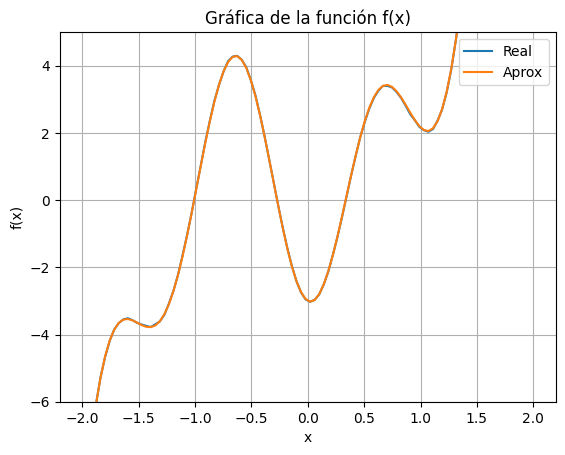

In [77]:
a, b, c, d, e = ganador

def f(x):
  return a*x**3 + b*x**2 - c * x - d * math.cos(e*x)

y = [f(x_val) for x_val in x_puntos]

# Grafica la función
plt.plot(x_puntos, y_puntos, label='Real')
plt.plot(x_puntos, y, label='Aprox')
plt.ylim(-6,5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de la función f(x)')
plt.legend()
plt.grid(True)
plt.show()